Importing libraries.

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Load dataset.

In [6]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


This dataset, sourced from Kaggle, consists of daily weather observations from
12-1-2008 to 6-25-2017 from various Australian locations. It contains 23 features and
approximately 145,650 rows, capturing various weather metrics essential for rain
prediction.

In [8]:
data.shape

(145460, 23)

Data Preprocessing
   1. Data distribution
   2. Corelations between features and with target variable.
   3. Handling missing values
   5. Identifying and removing outliers
   6. Encoding categorical variables

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

descriptive statistics for numerical columns

In [12]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [13]:
print(data.isnull().mean() *100)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64


In [14]:
categorical_cols = data.select_dtypes(include='object').columns
numeric_cols = data.select_dtypes(include='number').columns
print("Categorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

Categorical Columns: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')
Numeric Columns: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [15]:
for col in categorical_cols:
    print(data[col].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [16]:
for col in categorical_cols:
    print(f"{col} has {data[col].nunique()} unique values.")

Date has 3436 unique values.
Location has 49 unique values.
WindGustDir has 16 unique values.
WindDir9am has 16 unique values.
WindDir3pm has 16 unique values.
RainToday has 2 unique values.
RainTomorrow has 2 unique values.


In [17]:
print(data[numeric_cols].describe())

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

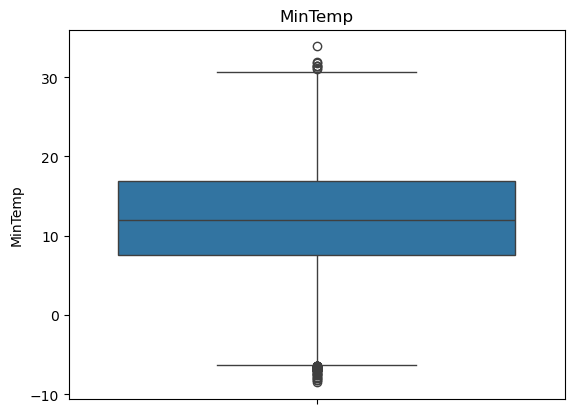

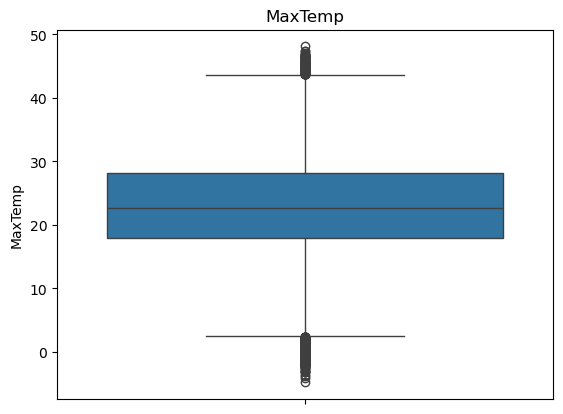

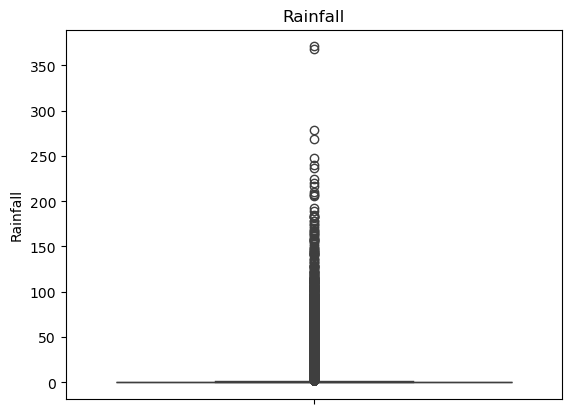

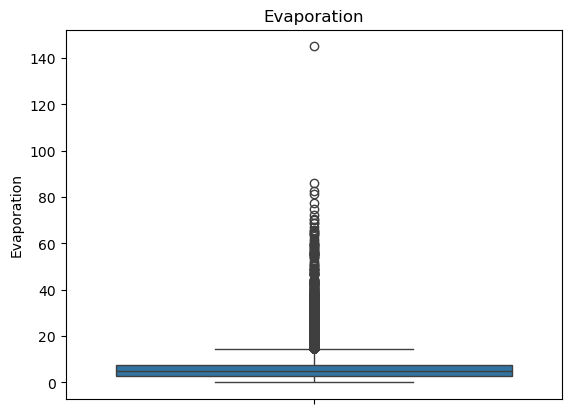

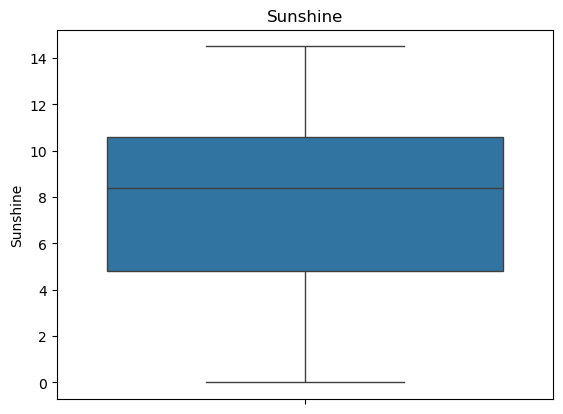

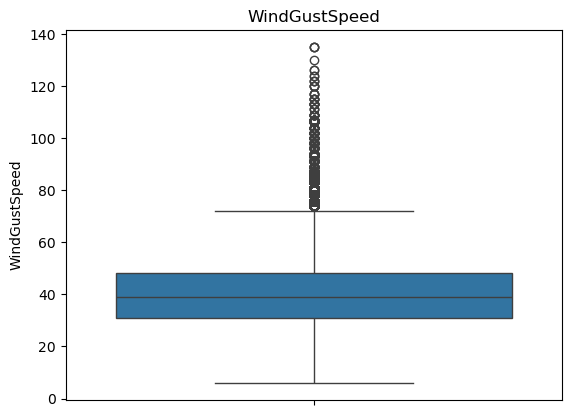

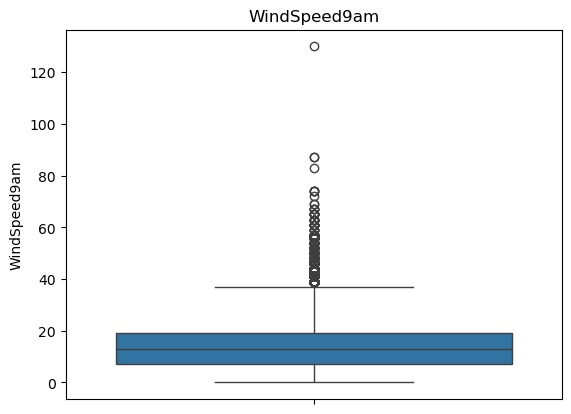

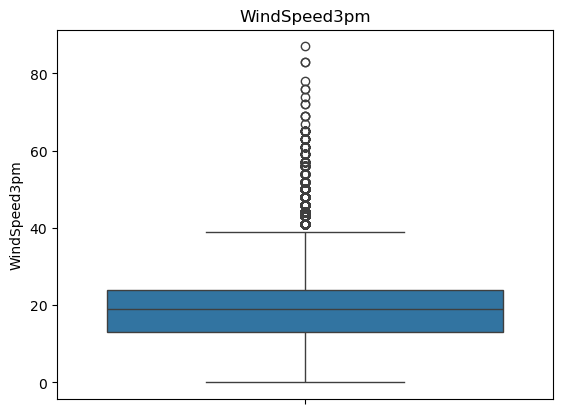

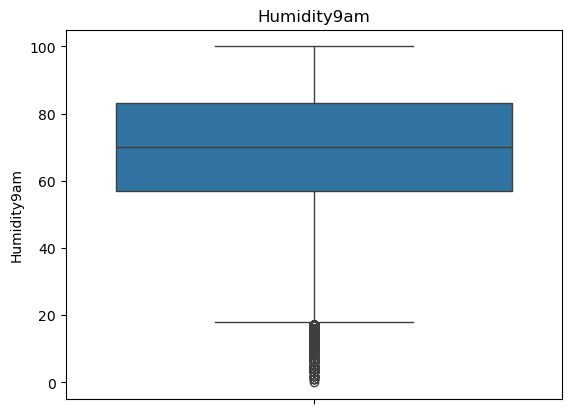

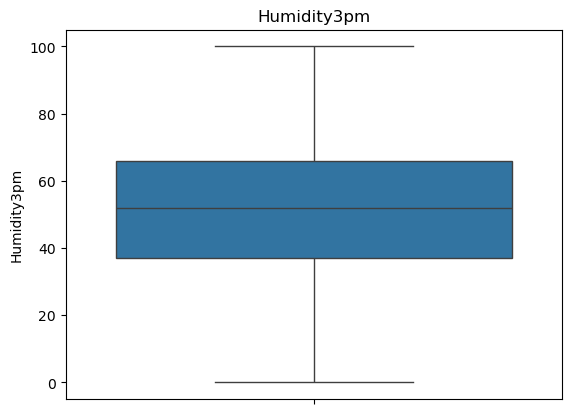

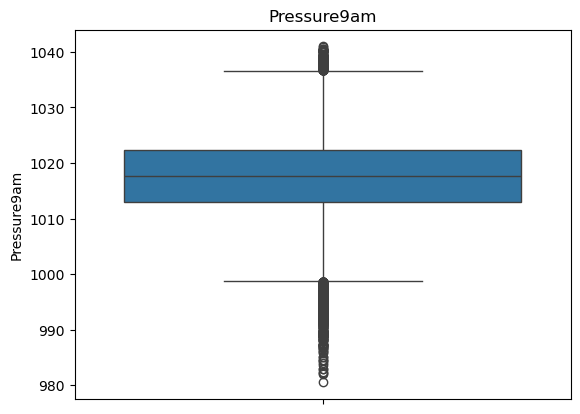

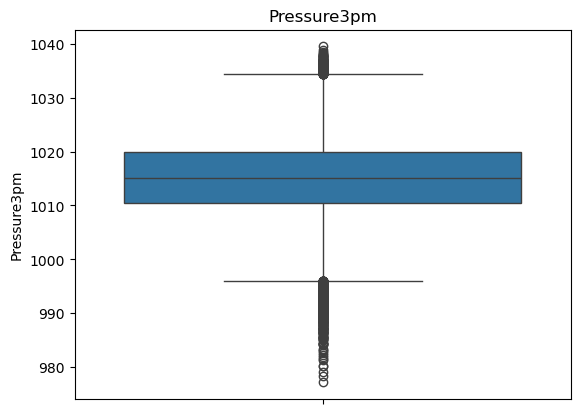

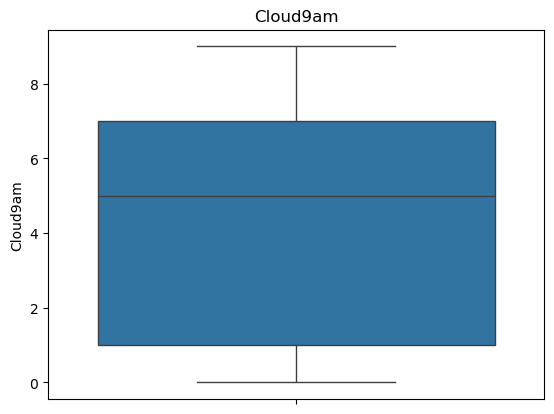

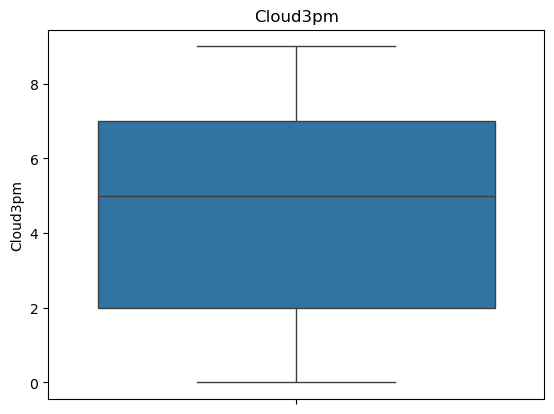

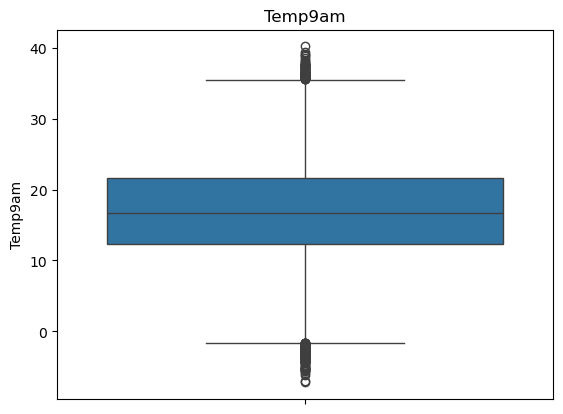

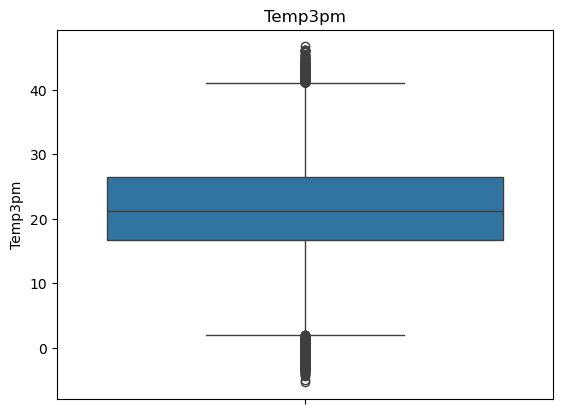

In [18]:
for col in numeric_cols:
    sns.boxplot(data[col])
    plt.title(col)
    plt.show()

/home/mehboob/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


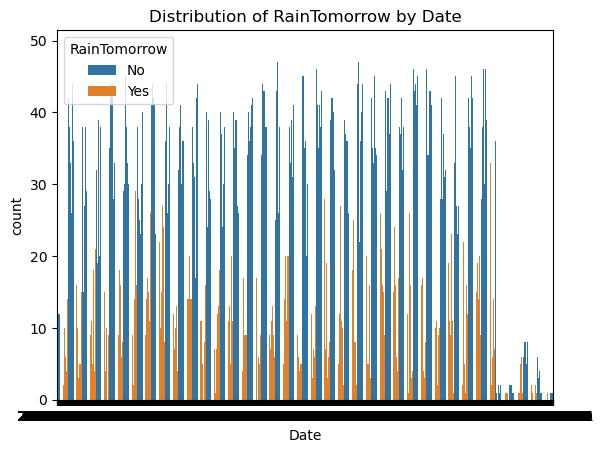

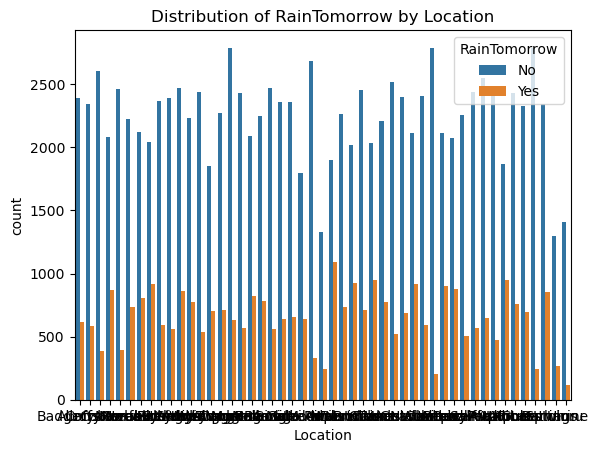

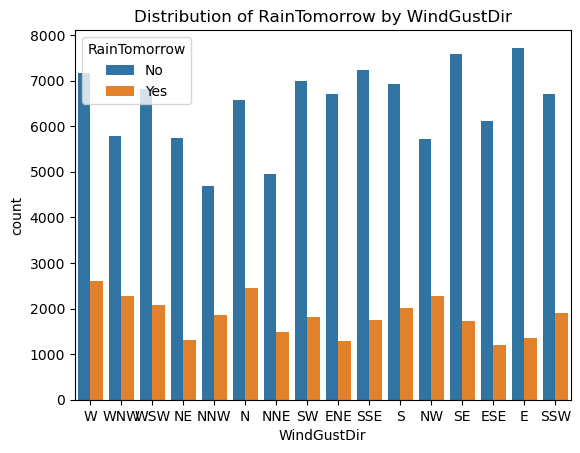

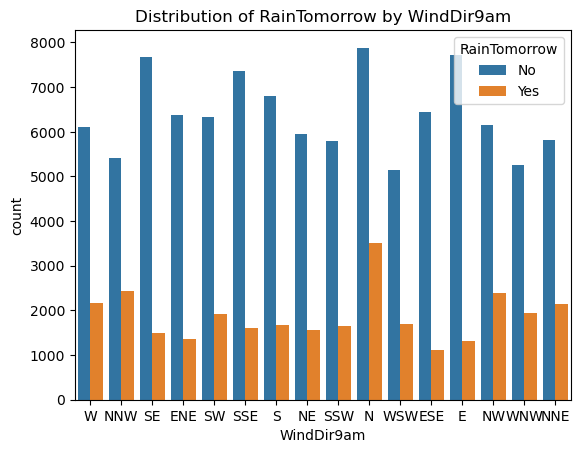

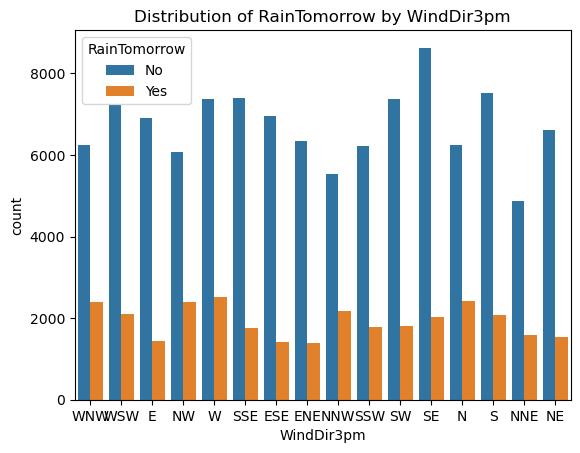

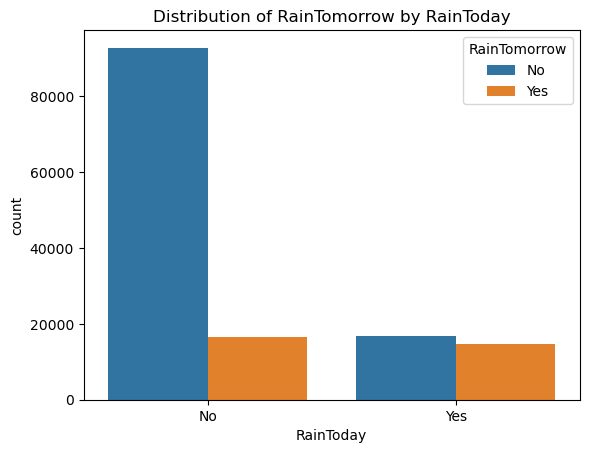

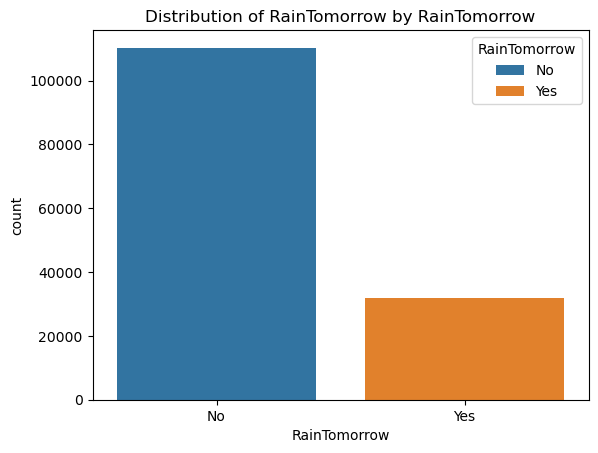

In [19]:
for col in categorical_cols:
    sns.countplot(x=col, hue='RainTomorrow', data=data)
    plt.title(f"Distribution of RainTomorrow by {col}")
    plt.show()

In [20]:
data['Month'] = pd.to_datetime(data['Date']).dt.month

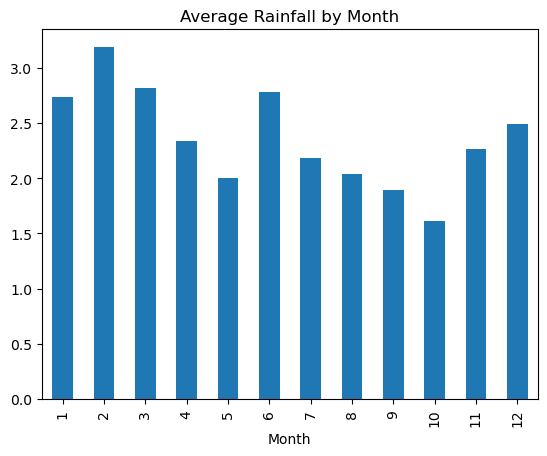

In [21]:
data.groupby('Month')['Rainfall'].mean().plot(kind='bar')
plt.title('Average Rainfall by Month')
plt.show()

In [22]:
data.drop('Month',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

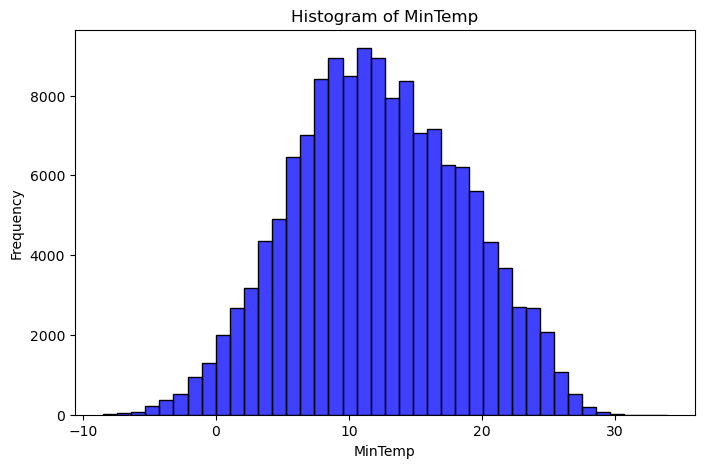

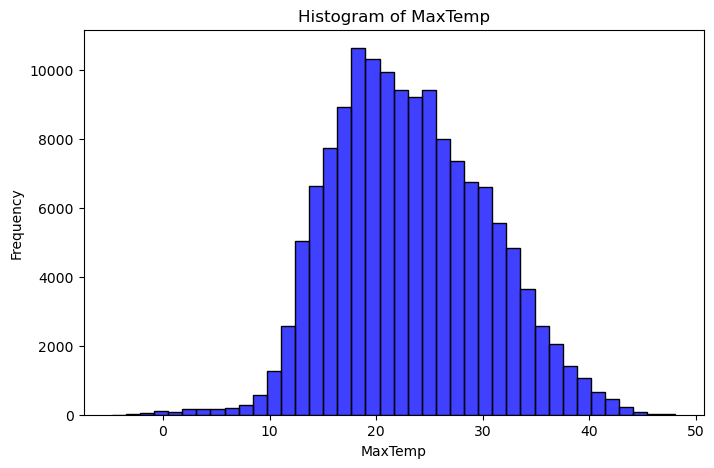

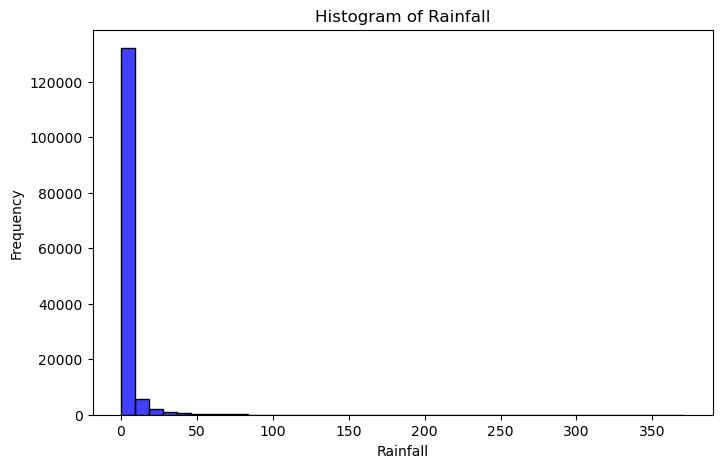

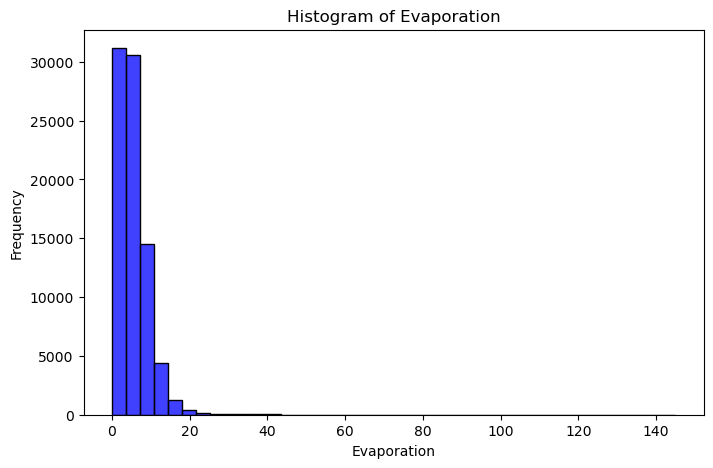

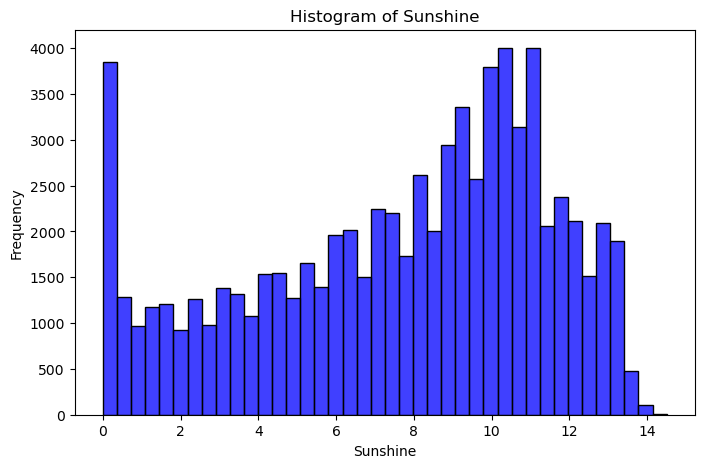

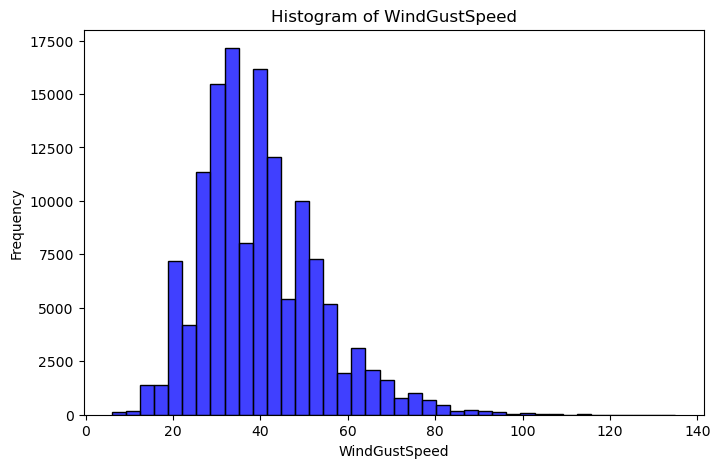

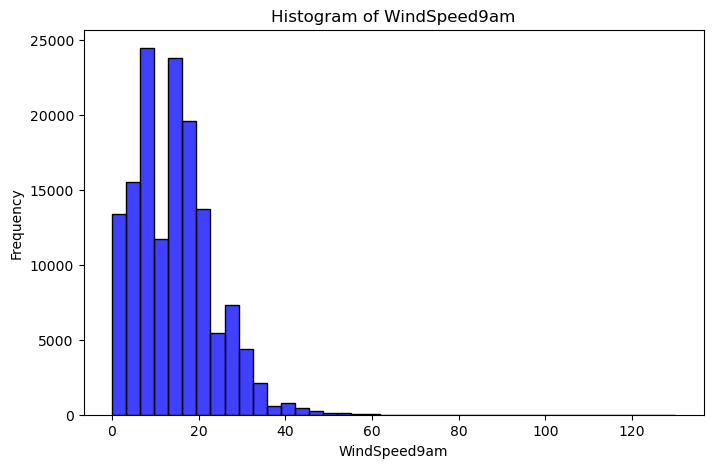

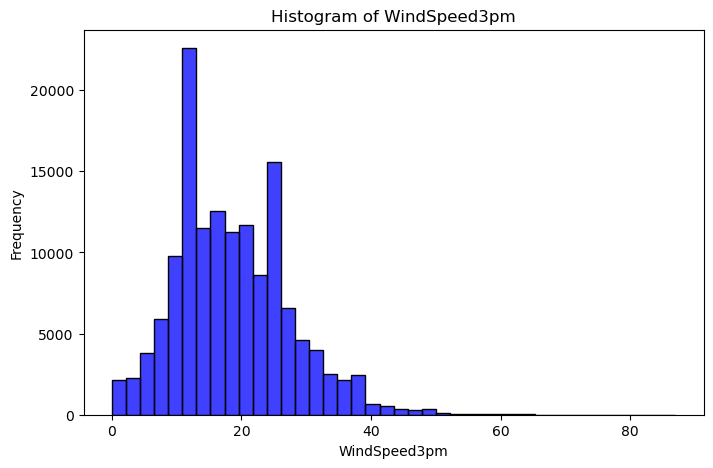

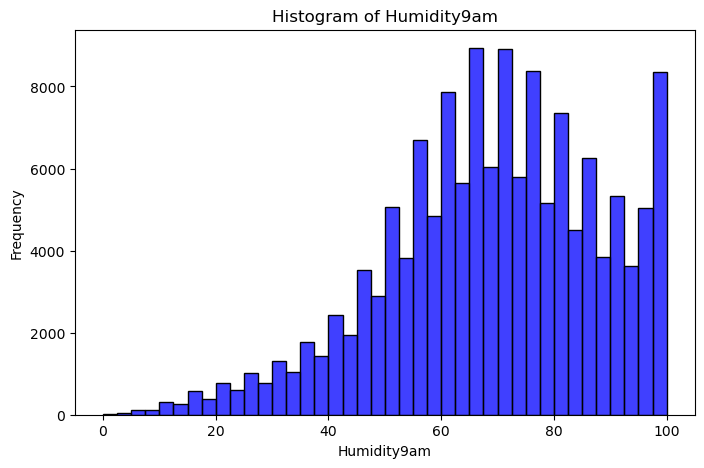

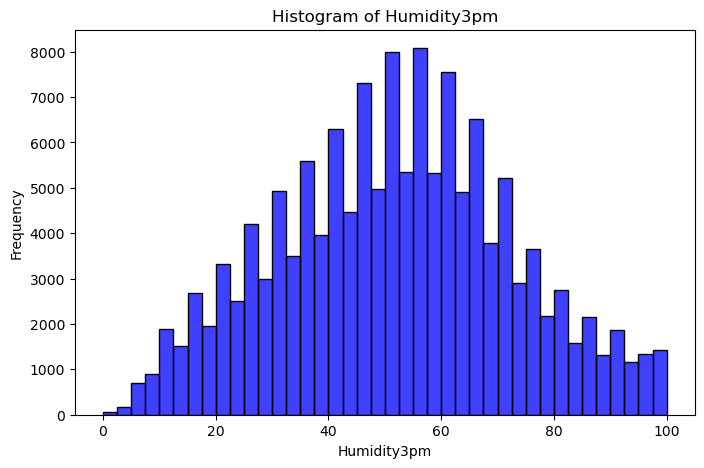

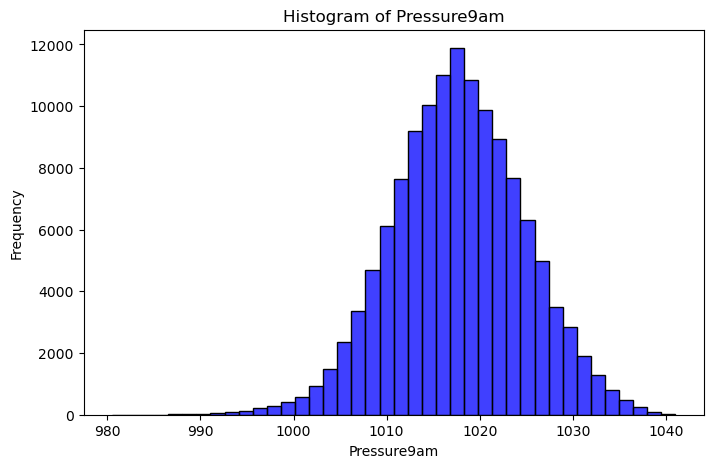

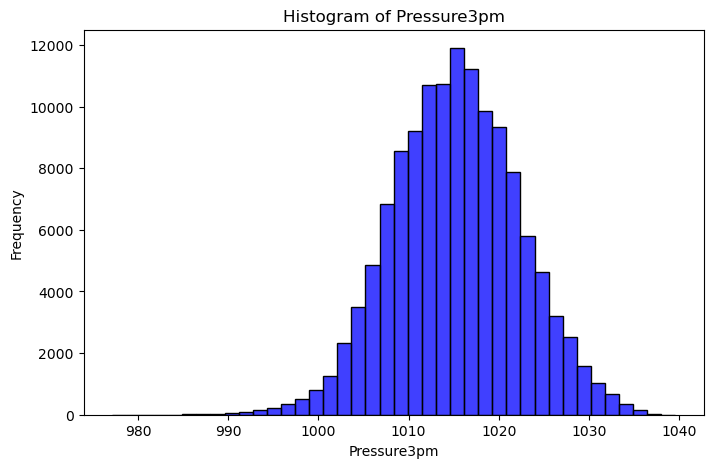

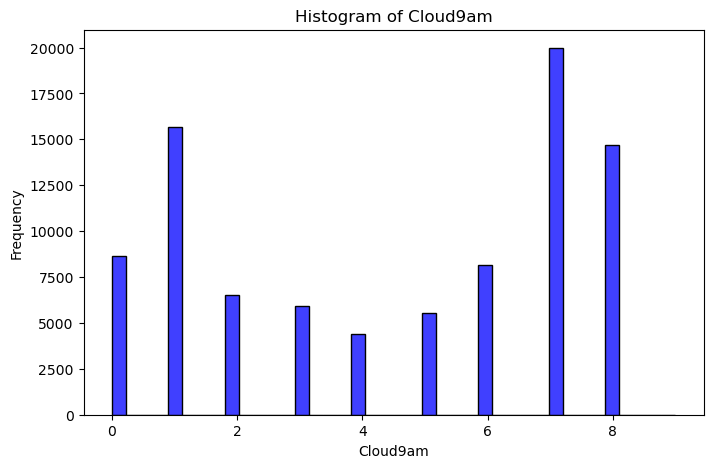

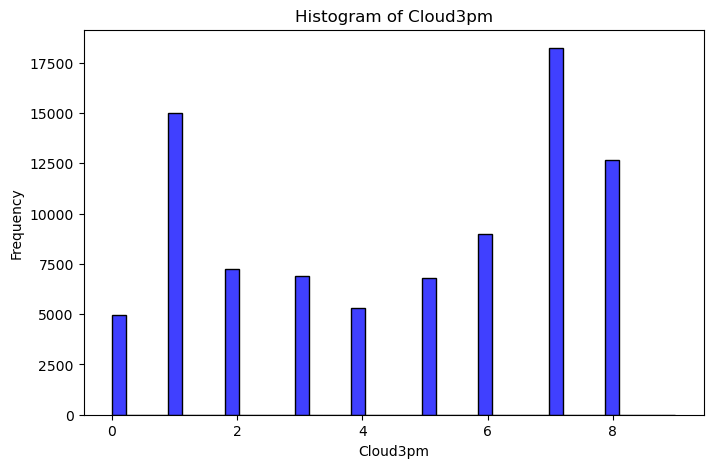

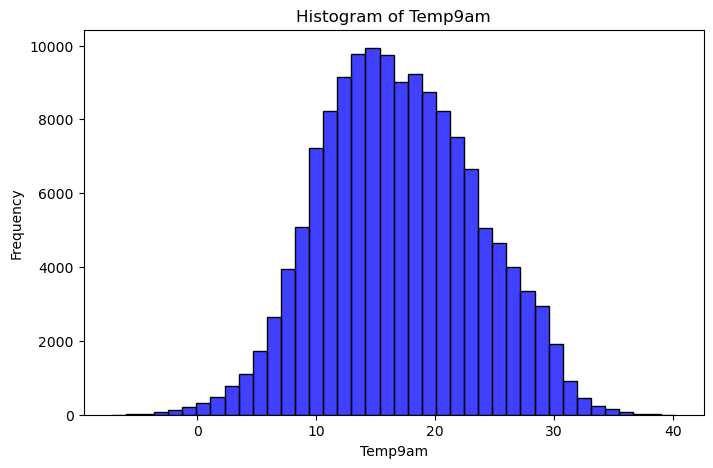

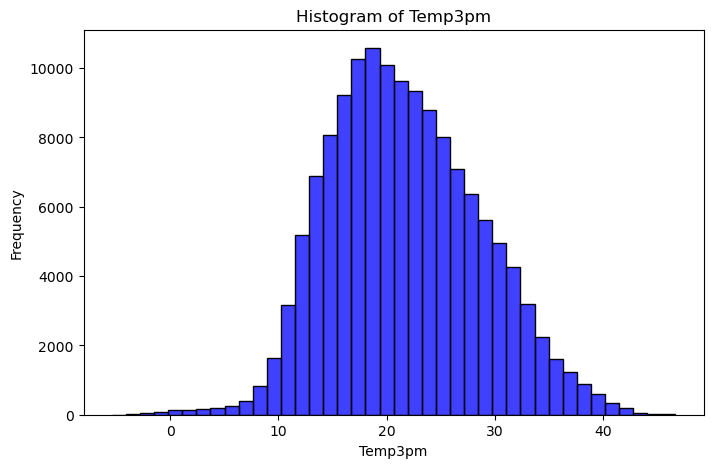

In [23]:
# Data Distribution for all Numerical Columns
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], bins=40, color='blue', kde=False)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Distribution of clases 'YES' and 'NO' 

In [1]:
class_counts = data['RainTomorrow'].value_counts()

print("Class Distribution:\n", class_counts)

plt.figure(figsize=(6, 4), dpi=120)
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution in RainTomorrow")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Class Imbalance Ratio (Max/Min): {imbalance_ratio:.2f}")


NameError: name 'data' is not defined

Target Variable: RainTomorrow (predict whether it will rain tomorrow)
Features: Includes numerical (e.g., MinTemp, Rainfall) and categorical (e.g., Location, RainToday) data.
Missing Values: Some columns, like Evaporation and Sunshine, have significant missing values even target variable contains missing values.

In [ ]:
#Corelation using pearson method.
corr = data.corr(method = 'pearson', numeric_only = True)

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()
#below  heatmap clearly shows how features are correlated with each other, ranging from -1 (negative correlation)
#to +1 (positive correlation).

we can observe that features like Humidity3pm strongly correlate with Rainfall, making it a good predictor.

In [ ]:
data.isnull().sum()

In [ ]:
np.array(data.isnull()).sum()

In [ ]:
forward_fill = data['Rainfall'].fillna(method='ffill')
backward_fill = data['Cloud3pm'].fillna(method='bfill')

In [ ]:
np.array(data.isnull()).sum()

In [ ]:
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False) 
plt.show()   #visual representaiton of the missing values

In [ ]:
#the another approach that i am thinking is to calculate mean of the previous 3 and net 3 values then replace missing value but as in my
#dataset contains continious too much missing values didn't works 
data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)

According to my observation filling forward and backward is can be efficient way as this is time series data and day has signigicanly effect
on the other day. Another method that could be which is iterative imputer let's suppose we have feature Temp9am and Temp3pm so, if 3pm 
values missing we can train a model on the other features like temp9am and other features which also significanly effects model performance.

In [ ]:
np.array(data.isnull()).sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output= False, handle_unknown='ignore')
encoded = encoder.fit_transform(data[categorical_cols])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Converting Categorical columsn to Numerical values to train model let suppose simple linear model.

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

one_hot_df = pd.DataFrame(
    one_hot_encoded, 
    columns=encoder.get_feature_names_out(categorical_columns)
)
data = data.drop(columns=categorical_columns)

data = pd.concat([data.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)


In [ ]:
data.head()